# Test Save to PDF

Datashader currently has a known bug where, upon saving figures to PDF, the rasterized portion of the Datashader output is scaled differently from the vector-based elements (such as axes, labels, etc.). This notebook demonstrates **fixing** this bug by ensuring the Datashader images render correctly within a single PDF figure.

---

## Overview of the Notebook

1. **Dataset Creation**  
   We use a function `create_dataset` to generate synthetic data points forming multiple Gaussian-distributed clusters. Each cluster is labeled via a `"cluster"` column, allowing for easy categorization and coloring in plots.

2. **Visualization with Datashader**  
   We create side-by-side subplots with Matplotlib and Datashader:
   - **First subplot** uses a simple `ds.Point("column1", "column2")` mapping.
   - **Second subplot** uses the same mapping but includes an aggregator `ds.count_cat("cluster")` to highlight the different clusters.
   
3. **Saving the Figure to PDF**  
   We save the figure as `"datashader-image.pdf"`. The key issue addressed here is the scaling difference that occurs for Datashader’s rasterized output in PDF export. This notebook demonstrates how the bug is fixed.

4. **Displaying the Generated PDF Inline**  
   Finally, we use an `IFrame` to show the PDF directly inside the notebook. This makes it straightforward to verify that the rasterized image and the vector elements align properly.

---

## Conclusion

By running through this example, you can:
- Generate a reproducible synthetic dataset with multiple clusters,
- Visualize it via Datashader in Matplotlib subplots,
- Save the visualization to PDF to test the scaling behavior,
- Check the output inline to confirm whether the Datashader rasterization and vector elements are scaled appropriately.

This notebook can serve as a reference for anyone encountering similar PDF scaling issues with Datashader and seeking a workaround. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datashader as ds
from datashader.mpl_ext import dsshow

In [2]:
def create_dataset(
    seed: int = 42, n_points: int = 10000, n_clusters: int = 4
) -> pd.DataFrame:
    """
    Create a pandas DataFrame with three Gaussian-distributed clusters.

    Parameters
    ----------
    seed : int, optional
        Random seed for reproducibility. Default is 42.
    n_points : int, optional
        Number of points per cluster. Default is 500.
    n_clusters : int, optional
        Number of clusters to create. Default is 4.

    Returns
    -------
    pd.DataFrame
        A DataFrame with columns "column1", "column2", and "cluster".
        Each row represents a point in one of three clusters.
    """
    # Set random seed for reproducibility
    np.random.seed(seed)

    clusters = []
    for i in range(n_clusters):
        cluster = np.random.normal(loc=[i * 3, 0], scale=[1, 1], size=(n_points, 2))
        _df = pd.DataFrame(cluster, columns=["column1", "column2"])
        _df["cluster"] = str(i + 1)
        clusters.append(_df)

    # Combine all clusters into a single DataFrame
    df = pd.concat(clusters, ignore_index=True)
    df["cluster"] = df["cluster"].astype("category")

    return df

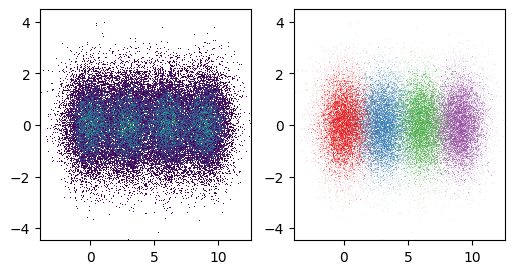

In [3]:
df = create_dataset()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# Plot 1
dsshow(
    df,
    ds.Point("column1", "column2"),
    aspect="auto",
    ax=axes[0],
)

# Plot 2
dsshow(
    df,
    ds.Point("column1", "column2"),
    aspect="auto",
    aggregator=ds.count_cat("cluster"),
    ax=axes[1],
)

plt.savefig("datashader-image.pdf")
plt.show()

In [4]:
from IPython.display import IFrame

# Display the saved PDF inline
IFrame("datashader-image.pdf", width=1000, height=400)